# Fair Fare: A Deep Dive into Taxi Price Fluctuations and Congestion Pricing in New York City

Section: B1

Team Number: Team 3

Members: Jooyeon Lee, Jeonghee (Christina) Son, Crystal Leatvanich, Courtney Vincent

Date: February 12, 2025

## Proposal

Through this project, we hope to answer critical questions like fare equity across neighborhoods
and how location influences price fluctuations. Our analysis will dive into understanding how
pricing varies across the city, with a particular focus on the new congestion pricing zone. Using
unsupervised machine learning techniques such as dimensionality reduction, K-means,
hierarchical clustering, and anomaly detection we aim to uncover associations and patterns in the
data. By analyzing trip data, we will identify location-based pricing trends and detect areas
where fare increases are disproportionately high due to congestion pricing.
For example, we will assess whether certain areas experience higher price variability than others,
potentially highlighting regions where pricing structures could be adjusted for passengers. This
information could be useful for policymakers and transportation authorities in improving pricing
models, ensuring its fairness, and optimizing taxi operations across New York City.
This deeper dive into spatial patterns and pricing will provide insights not only into current fare
disparities but also into ways to improve the overall transparency and fairness of the city's taxi
fare system, ensuring it meets the needs of both passengers and operators.

## Exploratory Data Analysis (EDA)

### Data Source

[NYC Taxi Trip Data](https://data.cityofnewyork.us/Transportation/2023-Yellow-Taxi-Trip-Data/4b4i-vvec/about_data)

The dataset consists of trip records submitted by New York City's yello taxi Technology Service Providers, containing details such as pickup and drop-off dates/times, locations, distances and fares. Originally, it spanned around 38 million rows with a total size of 3.52 GB. However, due to its large size, we applied random sampling, reducing it to 200,000 rows with 19 columns for analysis.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
taxi_data = pd.read_csv('/content/drive/MyDrive/BA820-Group Project/sampled_data.csv')

Mounted at /content/drive


###Summary Statistics

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               200000 non-null  int64  
 1   tpep_pickup_datetime   200000 non-null  object 
 2   tpep_dropoff_datetime  200000 non-null  object 
 3   passenger_count        193101 non-null  float64
 4   trip_distance          200000 non-null  float64
 5   RatecodeID             193101 non-null  float64
 6   store_and_fwd_flag     193101 non-null  object 
 7   PULocationID           200000 non-null  int64  
 8   DOLocationID           200000 non-null  int64  
 9   payment_type           200000 non-null  int64  
 10  fare_amount            200000 non-null  float64
 11  extra                  200000 non-null  float64
 12  mta_tax                200000 non-null  float64
 13  tip_amount             200000 non-null  float64
 14  tolls_amount           200000 non-nu

In [ ]:
num_columns = taxi_data.select_dtypes(include=['number'])
num_columns.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,200000.000000,193101.000000,200000.000000,193101.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,193101.000000,193101.000000
mean,1.738495,1.374866,4.785999,1.634005,165.369115,163.796390,1.184465,19.444202,1.554802,0.485714,3.507406,0.582085,0.979696,28.359865,2.266262,0.138672
std,0.444883,0.896346,304.341505,7.374074,63.925262,69.928236,0.554237,18.830230,1.831698,0.107858,4.033558,2.177846,0.197667,23.466912,0.795142,0.466193
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-500.000000,-7.500000,-0.500000,-22.200000,-27.550000,-1.000000,-451.000000,-2.500000,-1.750000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.950000,2.500000,0.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.800000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.410000,0.000000,1.000000,30.720000,2.500000,0.000000
max,6.000000,7.000000,119576.840000,99.000000,265.000000,265.000000,4.000000,637.900000,12.750000,0.800000,170.000000,132.040000,1.000000,656.150000,2.500000,1.750000


In [ ]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,10/26/2023 06:47:26 PM,10/26/2023 07:11:34 PM,1.0,3.30,1.0,N,186,263,1,19.8,5.0,0.5,5.25,0.0,1.0,31.55,2.5,0.0
1,2,08/29/2023 12:10:22 PM,08/29/2023 12:15:13 PM,1.0,0.82,1.0,N,234,170,1,7.2,0.0,0.5,2.00,0.0,1.0,13.20,2.5,0.0
2,1,10/12/2023 08:51:29 AM,10/12/2023 08:57:07 AM,1.0,0.70,1.0,N,238,238,1,7.2,2.5,0.5,2.20,0.0,1.0,13.40,2.5,0.0
3,2,09/14/2023 05:06:53 PM,09/14/2023 05:17:53 PM,1.0,0.30,1.0,N,48,50,1,10.0,2.5,0.5,3.30,0.0,1.0,19.80,2.5,0.0
4,1,05/06/2023 02:11:12 PM,05/06/2023 02:16:21 PM,4.0,0.80,1.0,N,229,233,2,7.2,2.5,0.5,0.00,0.0,1.0,11.20,2.5,0.0


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6899
trip_distance               0
RatecodeID               6899
store_and_fwd_flag       6899
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6899
airport_fee              6899
dtype: int64


<Axes: >

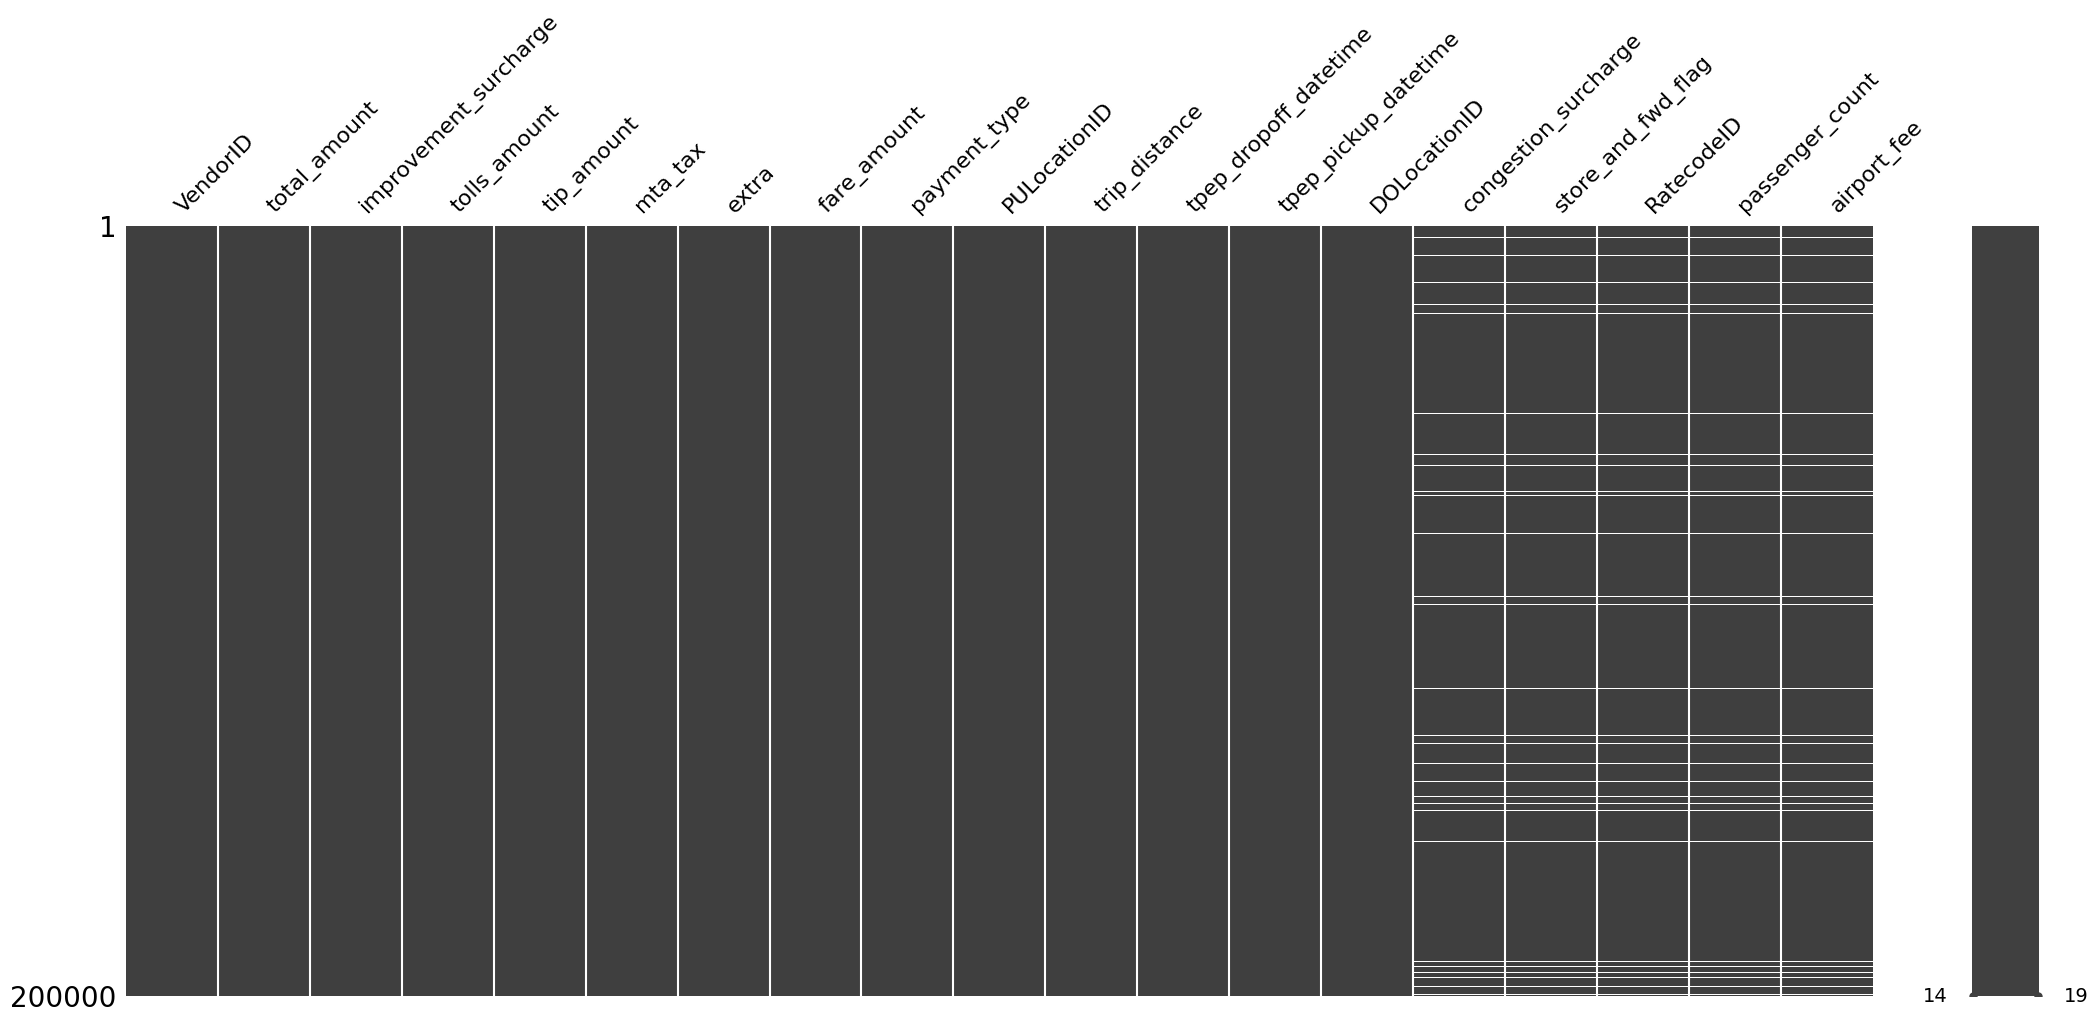

In [ ]:
import missingno as msno
print(taxi_data.isnull().sum())
msno.matrix(taxi_data[taxi_data.isnull().sum().sort_values().index])

###Outliers and Patterns

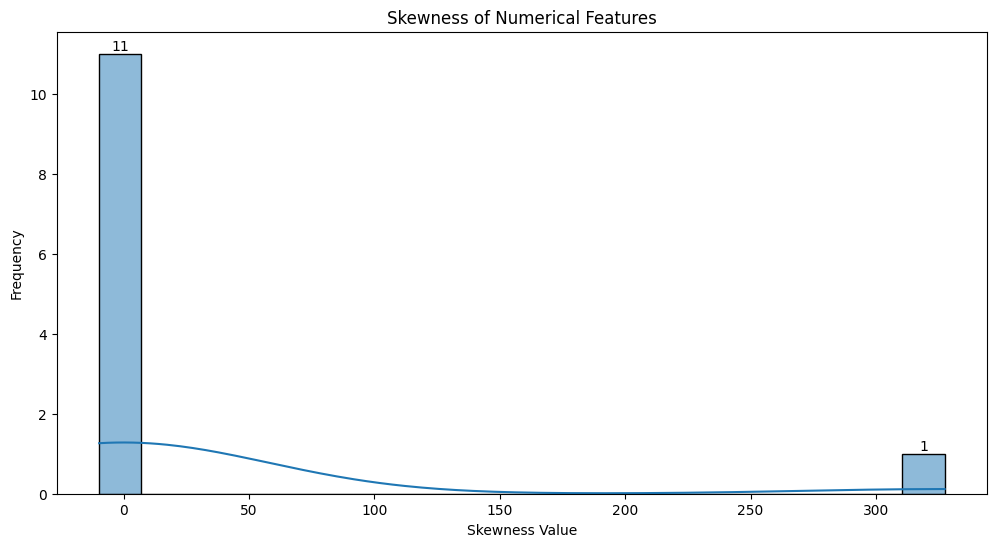

In [ ]:
#skew chart to spot outliers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

skewness_values = taxi_data.select_dtypes(include=[np.number]).apply(skew)

plt.figure(figsize=(12, 6))
ax = sns.histplot(skewness_values, bins=20, kde=True)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width() / 2, height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness Value")
plt.ylabel("Frequency")
plt.show()

The histogram shows the skewness of numerical features, indicating how balanced or imbalanced their distributions are. The X-axis represents skewness values (0 = normal, higher values = right-skewed), while the Y-axis shows the number of features in each range. Most features have skewness between 0 and 5, meaning they are nearly normal or moderately skewed. However, one feature has extreme skewness, making it a clear outlier with a highly imbalanced distribution. This could distort analysis and may require further investigation or transformation to ensure more reliable results.

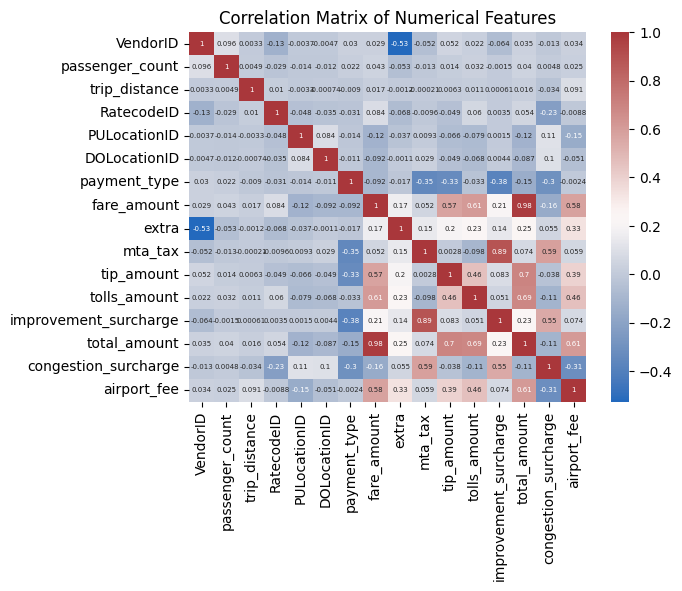

In [ ]:
#check for patterns
import seaborn as sns
import matplotlib.pyplot as plt

corr = taxi_data.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="vlag", annot_kws={"size": 5})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

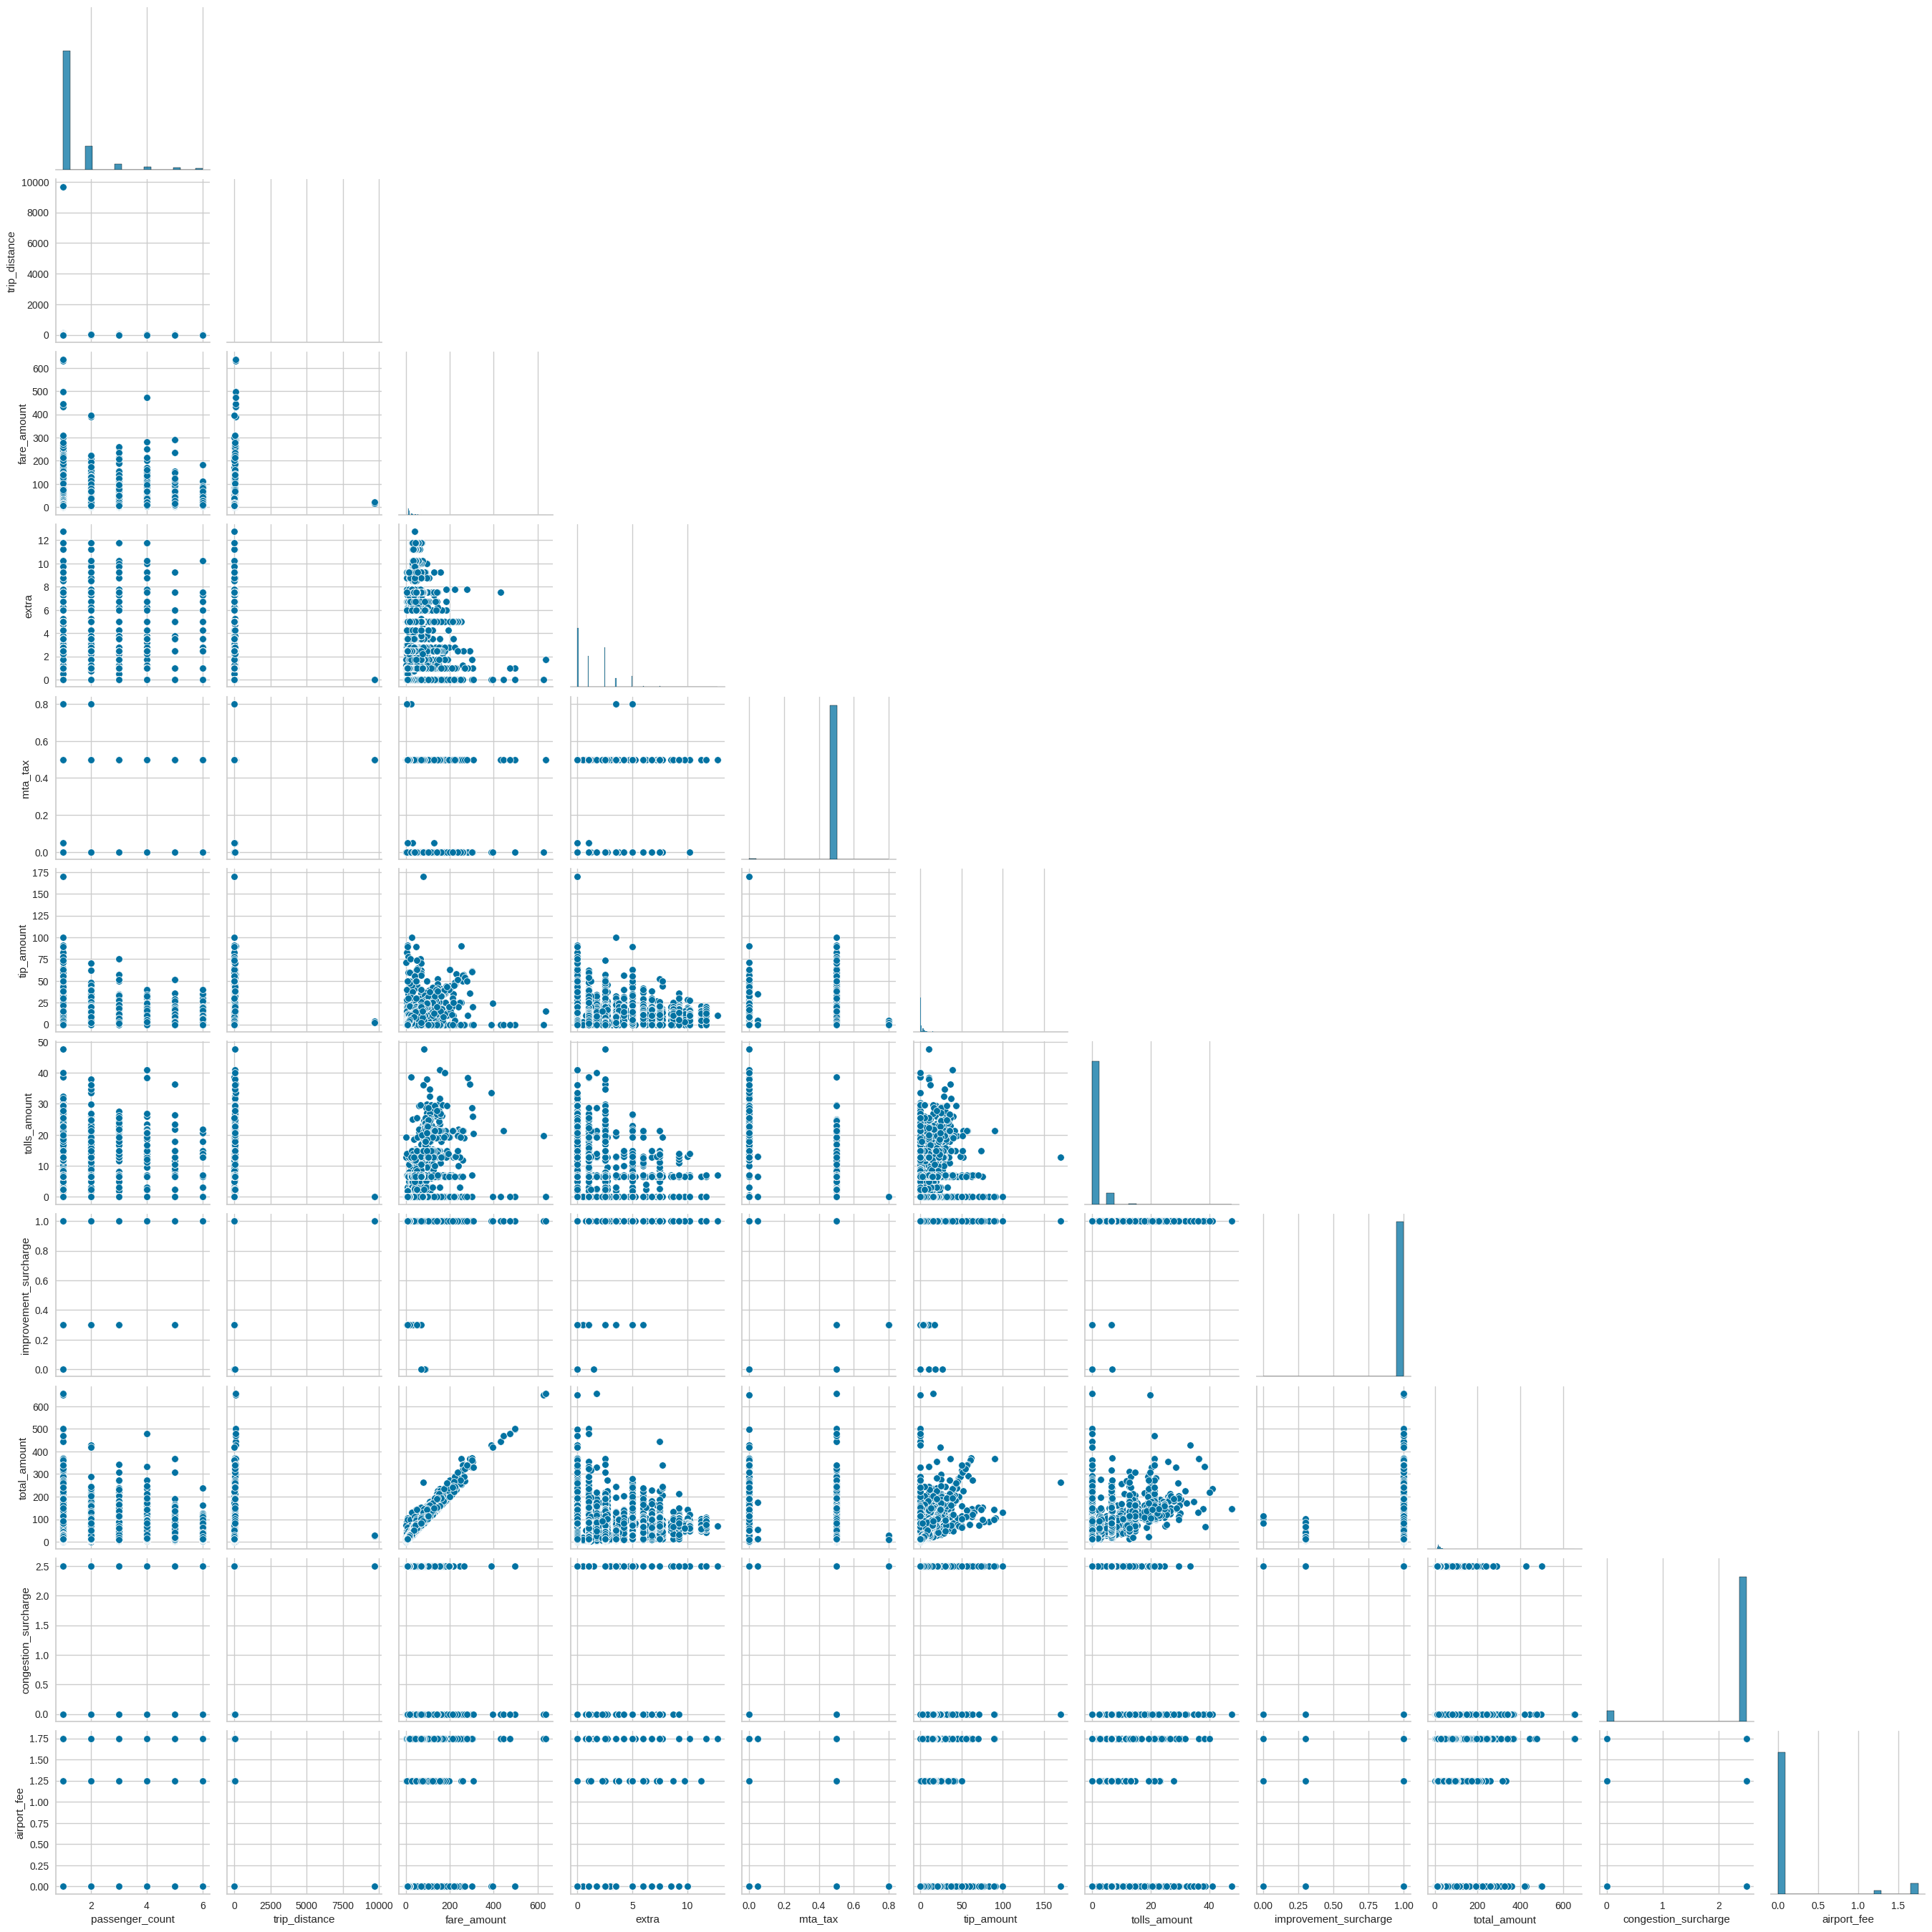

In [ ]:
#pairplot
num_cols = taxi_data.select_dtypes(include=['number'])
sns.pairplot(num_cols.select_dtypes(include=['number']), corner=True)


## Preprocessing



The preprocessing of the dataset consisted of several key steps to ensure accuracy and consistency. An initial examination of missing data revealed that missing values were all located within the same rows. As a result, 6.8k rows with null values were removed. Columns were updated to their correct data types. This included converting certain fields from numerical to categorical variables to better represent vendor IDs, location IDs, and payment types. Additionally, timestamps for pickup and drop off times were put into their proper formats. To address inconsistencies, any instances where the passenger count was recorded as 0 were updated to 1, as a taxi ride should have at least one passenger. Rows where the recorded trip distance was zero were also removed as they were likely erroneous. Many rows contained negative values in fields such as fare amount, MTA tax, tip amount, toll amount, and total amount. Since these values should not be negative, only rows with positive amounts were retained. Lastly, a check for duplicate entries was performed, but none were found.

###Data Cleaning

In [ ]:
#check wether the null columns are all the same null rows
null_test = taxi_data[taxi_data['passenger_count'].isna()][['passenger_count','RatecodeID','store_and_fwd_flag','congestion_surcharge','airport_fee']]
print(null_test.isna().sum())

passenger_count         6899
RatecodeID              6899
store_and_fwd_flag      6899
congestion_surcharge    6899
airport_fee             6899
dtype: int64


In [ ]:
#drop null passengers to drop all other nulls
taxi_data.dropna(subset = ['passenger_count'],inplace = True)
taxi_data.isnull().sum()

#reset index
taxi_data.reset_index(drop = True,inplace = True)

In [ ]:
#update columns to correct type (categories / timestamp)
change_categories = ['VendorID','RatecodeID','PULocationID','DOLocationID','payment_type']
taxi_data[change_categories] = taxi_data[change_categories].astype('category')

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

taxi_data.info()

<ipython-input-11-63cd46b9ad60>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
<ipython-input-11-63cd46b9ad60>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193101 entries, 0 to 193100
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               193101 non-null  category      
 1   tpep_pickup_datetime   193101 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  193101 non-null  datetime64[ns]
 3   passenger_count        193101 non-null  float64       
 4   trip_distance          193101 non-null  float64       
 5   RatecodeID             193101 non-null  category      
 6   store_and_fwd_flag     193101 non-null  object        
 7   PULocationID           193101 non-null  category      
 8   DOLocationID           193101 non-null  category      
 9   payment_type           193101 non-null  category      
 10  fare_amount            193101 non-null  float64       
 11  extra                  193101 non-null  float64       
 12  mta_tax                193101 non-null  floa

In [ ]:
#convert passenger_count = 0 values to passenger_count = 1
taxi_data.loc[taxi_data['passenger_count'] == 0,'passenger_count'] = 1

#drop rows where trip_distance = 0
taxi_data = taxi_data[taxi_data['trip_distance'] > 0]
taxi_data.reset_index(drop=True, inplace=True)

In [ ]:
#identify negative values in columns
neg_total_amt = taxi_data[taxi_data['total_amount'] < 0]['total_amount'].count()
neg_fare_amt = taxi_data[taxi_data['fare_amount'] < 0]['fare_amount'].count()
neg_extra = taxi_data[taxi_data['extra'] < 0]['extra'].count()
neg_mta_tax = taxi_data[taxi_data['mta_tax'] < 0]['mta_tax'].count()
neg_tip_amt = taxi_data[taxi_data['tip_amount'] < 0]['tip_amount'].count()
neg_tolls_amount = taxi_data[taxi_data['tolls_amount'] < 0]['tolls_amount'].count()
neg_improvement_surcharge = taxi_data[taxi_data['improvement_surcharge'] < 0]['improvement_surcharge'].count()
neg_congestion_surcharge = taxi_data[taxi_data['congestion_surcharge'] < 0]['congestion_surcharge'].count()
neg_airport_fee = taxi_data[taxi_data['airport_fee'] < 0]['airport_fee'].count()

print(f'neg_total_amt: {neg_total_amt}')
print(f'neg_fare_amt: {neg_fare_amt}')
print(f'neg_extra: {neg_extra}')
print(f'neg_mta_tax: {neg_mta_tax}')
print(f'neg_tip_amt: {neg_tip_amt}')
print(f'neg_tolls_amount: {neg_tolls_amount}')
print(f'neg_improvement_surcharge: {neg_improvement_surcharge}')
print(f'neg_congestion_surcharge: {neg_congestion_surcharge}')
print(f'neg_airport_fee: {neg_airport_fee}')

neg_total_amt: 1731
neg_fare_amt: 1722
neg_extra: 913
neg_mta_tax: 1697
neg_tip_amt: 1
neg_tolls_amount: 121
neg_improvement_surcharge: 1731
neg_congestion_surcharge: 1480
neg_airport_fee: 215


In [ ]:
#Filter negative values
taxi_data = taxi_data[taxi_data['total_amount'] > 0]
taxi_data.reset_index(drop=True, inplace=True)
taxi_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,188883,188883,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000
mean,2023-07-01 20:56:38.542489600,2023-07-01 21:14:01.442660352,1.391152,3.582175,19.608243,1.639531,0.496717,3.567819,0.588801,0.999671,28.740506,2.323846,0.142015
min,2008-12-31 23:34:45,2008-12-31 23:49:52,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2023-04-01 22:42:08.500000,2023-04-01 22:55:40,1.000000,1.080000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2023-06-25 19:52:34,2023-06-25 20:13:09,1.000000,1.800000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2023-10-05 18:31:02.500000,2023-10-05 18:48:40.500000,1.000000,3.400000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.600000,2.500000,0.000000
max,2023-12-31 23:52:35,2024-01-01 18:55:59,6.000000,9674.500000,637.900000,12.750000,0.800000,170.000000,47.750000,1.000000,656.150000,2.500000,1.750000
std,NaN,NaN,0.882411,31.796168,17.970805,1.825246,0.040442,3.980074,2.139402,0.015375,22.565650,0.639810,0.463714


## Analysis


We chose K-Means clustering to identify patterns in NYC taxi fare fluctuations and congestion pricing. Since our dataset does not have predefined labels, K-Means helps uncover hidden structures in the data, grouping trips with similar characteristics. Given the large volume of taxi trip data, K-Means is an efficient and scalable clustering algorithm.


The steps include:


1. Standardizing the Data: Ensuring all numeric variables have equal influence.
2. Applying PCA: Reducing dimensions while preserving variance.
3. Choosing Optimal Clusters: Using the Elbow Method.
4. K-Means Clustering: Assigning clusters and visualizing the results.

In [ ]:
!pip install psynlig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.9/455.9 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall

###PCA

To improve clustering performance, we first applied Principal Component Analysis (PCA) to reduce dimensionality while retaining over 90% of the variance. This step ensures that K-Means operates effectively without being affected by high-dimensional noise.

In [ ]:
#drop non-continuious numerical columns for model preperation
taxi_dataset_num = taxi_data.drop(columns=['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
                                           'DOLocationID', 'payment_type', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
normalized_data = sc.fit_transform(taxi_dataset_num)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

model = PCA()
model.fit(normalized_data)

transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

transformed_data_df.columns = [f"PC{i+1}" for i in range(taxi_dataset_num.shape[1])]
transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.217244,1.312156,0.078541,0.022169,-0.530418,0.228731,1.037095,0.777041,0.468601,-0.156591,-0.012733
1,-1.263792,-0.391260,-0.217560,0.000323,-0.170140,0.360081,-0.418975,-0.241245,-0.399216,0.142076,0.001332
2,-1.012798,0.449355,-0.236265,0.039227,-0.297820,0.211842,0.531424,0.067234,-0.167116,0.023260,-0.048369
3,-0.703337,0.465151,-0.121108,0.022915,-0.369189,0.242893,0.378944,0.235086,-0.085867,0.003972,0.036836
4,-1.187032,-0.359338,1.460441,0.093178,1.386959,-2.017769,1.188823,-0.125640,-0.008848,-0.035484,-0.050486
...,...,...,...,...,...,...,...,...,...,...,...
188878,0.048377,1.334310,0.062006,0.029016,-0.568587,0.193721,1.083272,0.861092,0.242131,-0.142099,-0.013527
188879,-0.559474,-0.037789,-0.013417,-0.018697,-0.299047,0.397831,-0.320422,0.155492,-0.080908,0.057830,0.015420
188880,-1.263267,-0.080594,-0.299049,0.025473,-0.168748,0.279880,0.035602,-0.308378,-0.200135,0.095925,0.016447
188881,-1.240662,0.399704,-0.391866,0.060562,-0.200958,0.158386,0.690006,-0.316393,0.023107,0.027635,0.038671


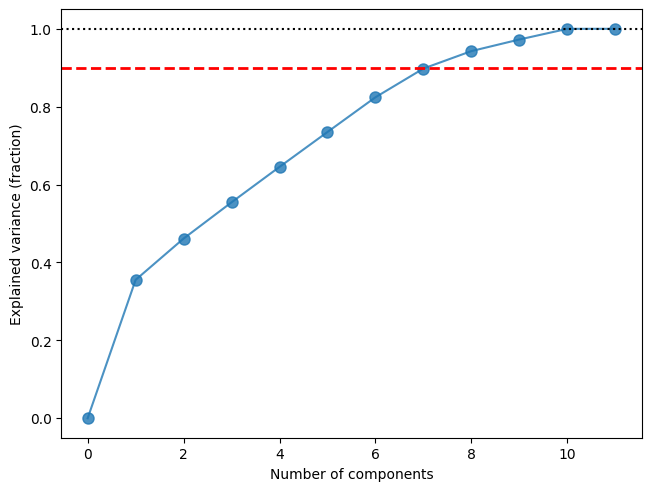

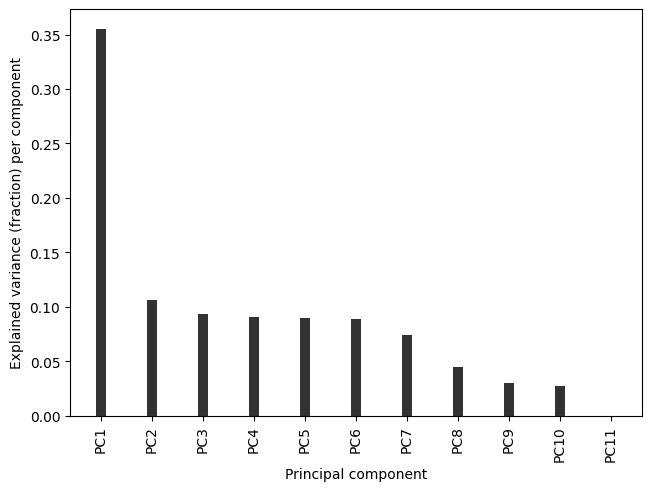

In [ ]:
# check variance to see how many features to keep

from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

n= 7
model = PCA(n)

#fit the data
model.fit(normalized_data)

# transform the data
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(n)]

transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.217244,1.312156,0.078541,0.022169,-0.530418,0.228731,1.037095
1,-1.263792,-0.391260,-0.217560,0.000323,-0.170140,0.360081,-0.418975
2,-1.012798,0.449355,-0.236265,0.039227,-0.297820,0.211842,0.531424
3,-0.703337,0.465151,-0.121108,0.022915,-0.369189,0.242893,0.378944
4,-1.187032,-0.359338,1.460441,0.093178,1.386959,-2.017769,1.188823
...,...,...,...,...,...,...,...
188878,0.048377,1.334310,0.062006,0.029016,-0.568587,0.193721,1.083272
188879,-0.559474,-0.037789,-0.013417,-0.018697,-0.299047,0.397831,-0.320422
188880,-1.263267,-0.080594,-0.299049,0.025473,-0.168748,0.279880,0.035602
188881,-1.240662,0.399704,-0.391866,0.060562,-0.200958,0.158386,0.690006


In [ ]:
components_df = pd.DataFrame(model.components_)

components_df.columns = taxi_dataset_num.columns
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

components_df

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
PC1,0.021892,0.085872,0.462946,0.166964,-0.190842,0.364785,0.399270,-0.002395,0.485130,-0.217142,0.372206
PC2,-0.222491,0.008038,-0.066263,0.610281,0.656655,0.094552,-0.084344,0.018150,0.000318,0.217192,0.280799
PC3,0.547012,0.112093,0.050156,-0.024190,0.064867,0.275229,0.156701,0.086761,0.115245,0.704109,-0.253023
PC4,0.009302,-0.075499,-0.012588,0.029693,-0.032270,-0.037807,-0.007652,0.991291,-0.017103,-0.083078,0.028127
PC5,0.466154,0.715422,-0.004038,-0.084762,0.242230,-0.167086,-0.172775,0.019465,-0.054864,-0.314433,0.212061
PC6,-0.639230,0.657759,0.016956,-0.110295,-0.121356,0.100108,0.067015,0.087668,0.031789,0.251874,-0.211918
PC7,0.145333,0.167625,-0.200832,0.705148,-0.517066,-0.266165,0.188314,-0.037445,-0.160490,-0.000411,-0.111308


In [ ]:
# selects the first 7 PCA
loadings = components_df.iloc[:7, :].mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings)
loadings_df

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
PC1,0.043283,0.169775,0.915282,0.330101,-0.377310,0.721209,0.789389,-0.004735,0.959140,-0.429307,0.735882
PC2,-0.240303,0.008682,-0.071568,0.659138,0.709224,0.102121,-0.091096,0.019603,0.000343,0.234579,0.303278
PC3,0.553518,0.113426,0.050752,-0.024478,0.065638,0.278502,0.158564,0.087793,0.116615,0.712483,-0.256032
PC4,0.009302,-0.075505,-0.012589,0.029696,-0.032273,-0.037811,-0.007652,0.991381,-0.017104,-0.083085,0.028129
PC5,0.462876,0.710391,-0.004010,-0.084166,0.240527,-0.165911,-0.171560,0.019328,-0.054478,-0.312222,0.210569
PC6,-0.633089,0.651439,0.016793,-0.109235,-0.120190,0.099146,0.066371,0.086826,0.031483,0.249454,-0.209882
PC7,0.130900,0.150978,-0.180887,0.635118,-0.465715,-0.239732,0.169612,-0.033726,-0.144551,-0.000370,-0.100253


In [ ]:
from sklearn.metrics import mean_squared_error

reconstructed_data = model.inverse_transform(transformed_data_df)
reconstruction_error = np.sqrt(mean_squared_error(normalized_data.T, reconstructed_data.T, multioutput='raw_values'))

mean_error = np.mean(reconstruction_error)
std_error = np.std(reconstruction_error)

valid_indices = np.where(reconstruction_error < mean_error + 3 * std_error)[0]

filtered_taxi_data = taxi_data.iloc[valid_indices]
filtered_taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2023-10-26 18:47:26,2023-10-26 19:11:34,1.0,3.30,1.0,N,186,263,1,19.8,5.0,0.5,5.25,0.0,1.0,31.55,2.5,0.0
1,2,2023-08-29 12:10:22,2023-08-29 12:15:13,1.0,0.82,1.0,N,234,170,1,7.2,0.0,0.5,2.00,0.0,1.0,13.20,2.5,0.0
2,1,2023-10-12 08:51:29,2023-10-12 08:57:07,1.0,0.70,1.0,N,238,238,1,7.2,2.5,0.5,2.20,0.0,1.0,13.40,2.5,0.0
3,2,2023-09-14 17:06:53,2023-09-14 17:17:53,1.0,0.30,1.0,N,48,50,1,10.0,2.5,0.5,3.30,0.0,1.0,19.80,2.5,0.0
4,1,2023-05-06 14:11:12,2023-05-06 14:16:21,4.0,0.80,1.0,N,229,233,2,7.2,2.5,0.5,0.00,0.0,1.0,11.20,2.5,0.0


In [ ]:
filtered_taxi_data_num = filtered_taxi_data.drop(columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
                                           'DOLocationID', 'payment_type', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])

When we examined the number of outliers, we found that they accounted for approximately 5% of the entire dataset, leading us to anticipate their potential impact on the final clustering process. To address this, we identified outliers using Reconstruction Error and mapped them back to the original dataset using their indices, allowing us to construct a final dataset without outliers. After this step, we will reapply Standardization and PCA on the cleaned dataset to ensure proper scaling and perform dimensionality reduction for the final analysis.

In [ ]:
sc = StandardScaler()
normalized_data = sc.fit_transform(filtered_taxi_data_num)

In [ ]:
model = PCA()
model.fit(normalized_data)

transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

transformed_data_df.columns = [f"PC{i+1}" for i in range(taxi_dataset_num.shape[1])]
transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.346198,0.944722,0.779409,-0.708136,0.031041,0.998949,-0.982849,-0.249304,0.016247,0.029106,-0.010897
1,-1.419597,-0.318625,-0.145568,-0.322660,-0.026535,-0.522380,0.409540,0.346996,0.055450,0.077341,0.001518
2,-1.196491,0.348016,0.150117,-0.579723,0.015103,0.505614,0.002518,0.160471,0.026312,0.100295,-0.053450
3,-0.910564,0.321319,0.275968,-0.565104,0.010562,0.398846,-0.205915,0.270950,0.029515,-0.152275,0.038860
4,-1.404391,-0.355083,0.105669,2.526409,0.269698,1.763312,0.198635,-0.198571,0.001388,0.112078,-0.055380
...,...,...,...,...,...,...,...,...,...,...,...
184826,0.001844,0.952959,0.781470,-0.757705,0.038329,1.138714,-0.975235,0.106505,0.006245,-0.082449,-0.015156
184827,-0.554226,-0.097036,0.187762,-0.353485,-0.024817,-0.426032,-0.127186,0.201985,0.055253,-0.030418,0.016804
184828,-1.405605,-0.042485,-0.115662,-0.422700,-0.008437,-0.074166,0.396439,0.041209,0.046940,0.120504,0.020719
184829,-1.425315,0.367575,-0.031202,-0.585749,0.019842,0.614452,0.312851,-0.244566,0.031303,0.100098,0.046817


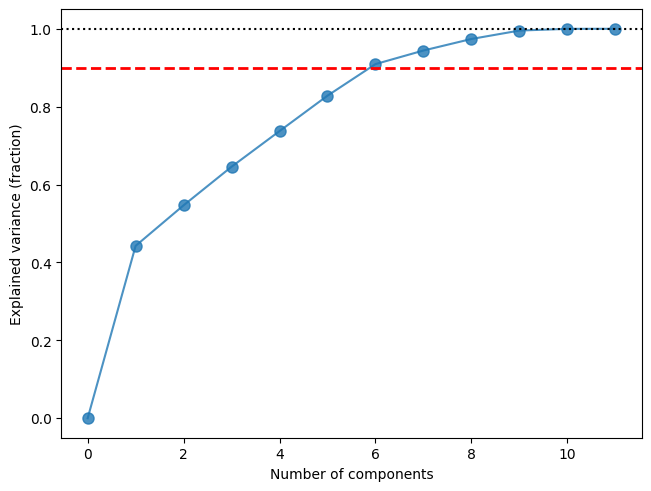

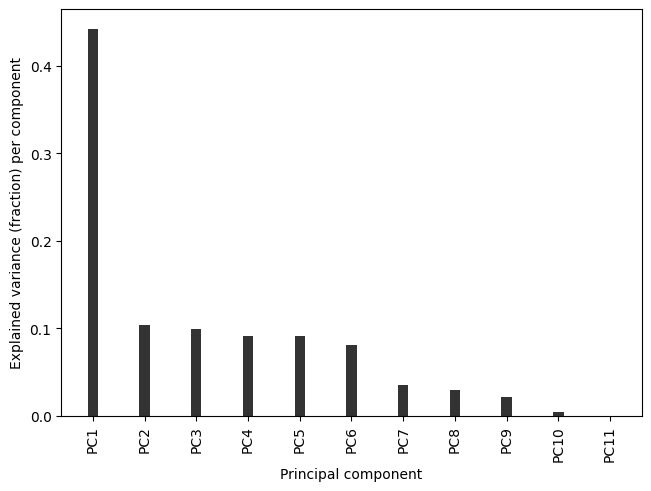

In [ ]:
from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

In [ ]:
n= 6
model = PCA(n)

model.fit(normalized_data)

transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

transformed_data_df.columns = [f"PC{i+1}" for i in range(n)]

transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.346198,0.944722,0.779409,-0.708136,0.031041,0.998949
1,-1.419597,-0.318625,-0.145568,-0.322660,-0.026535,-0.522380
2,-1.196491,0.348016,0.150117,-0.579723,0.015103,0.505614
3,-0.910564,0.321319,0.275968,-0.565104,0.010562,0.398846
4,-1.404391,-0.355083,0.105669,2.526409,0.269698,1.763312
...,...,...,...,...,...,...
184826,0.001844,0.952959,0.781470,-0.757705,0.038329,1.138714
184827,-0.554226,-0.097036,0.187762,-0.353485,-0.024817,-0.426032
184828,-1.405605,-0.042485,-0.115662,-0.422700,-0.008437,-0.074166
184829,-1.425315,0.367575,-0.031202,-0.585749,0.019842,0.614452


In [ ]:
components_df = pd.DataFrame(model.components_)

# Rename the columns
components_df.columns = taxi_dataset_num.columns

# Rename the rows
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

# selects the first 7 PCA
loadings = components_df.iloc[:6, :].mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings)
loadings_df

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
PC1,0.030216,0.940082,0.941781,0.338369,-0.277222,0.791263,0.787677,-0.002618,0.975341,-0.364853,0.758786
PC2,-0.226750,0.019791,-0.050065,0.518273,0.793265,-0.028753,-0.225129,0.019707,-0.027208,-0.080573,0.365335
PC3,0.044700,-0.003722,0.010559,0.210310,0.167135,0.308892,0.194983,0.010568,0.111497,0.887969,-0.283829
PC4,0.916126,0.074002,0.056793,-0.185754,0.309417,0.009389,-0.133183,-0.051762,0.027441,-0.010320,0.085275
PC5,0.073219,-0.011323,-0.008414,0.030260,-0.025876,-0.007733,0.006136,0.996461,-0.005594,-0.014474,0.003972
PC6,0.316993,-0.183955,-0.181772,0.706404,-0.357258,-0.164214,0.214892,-0.062148,-0.113118,-0.072544,0.053833


###K-Means Clustering

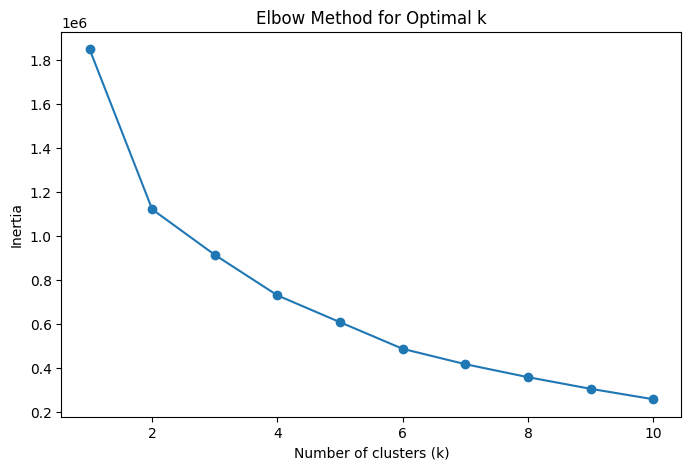

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(transformed_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init='random', random_state=42)
kmeans_result = kmeans.fit(transformed_data_df)

filtered_taxi_data_num["cluster_labels"] = kmeans_result.labels_

In [ ]:
filtered_taxi_data_num

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,cluster_labels
0,1.0,3.30,19.8,5.0,0.5,5.25,0.0,1.0,31.55,2.5,0.0,1
1,1.0,0.82,7.2,0.0,0.5,2.00,0.0,1.0,13.20,2.5,0.0,1
2,1.0,0.70,7.2,2.5,0.5,2.20,0.0,1.0,13.40,2.5,0.0,1
3,1.0,0.30,10.0,2.5,0.5,3.30,0.0,1.0,19.80,2.5,0.0,1
4,4.0,0.80,7.2,2.5,0.5,0.00,0.0,1.0,11.20,2.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
188878,1.0,1.70,15.6,5.0,0.5,5.55,0.0,1.0,27.65,2.5,0.0,1
188879,1.0,2.08,14.9,1.0,0.5,3.98,0.0,1.0,23.88,2.5,0.0,1
188880,1.0,1.08,7.2,1.0,0.5,1.00,0.0,1.0,13.20,2.5,0.0,1
188881,1.0,0.85,6.5,2.5,0.5,0.00,0.0,1.0,13.00,2.5,0.0,1


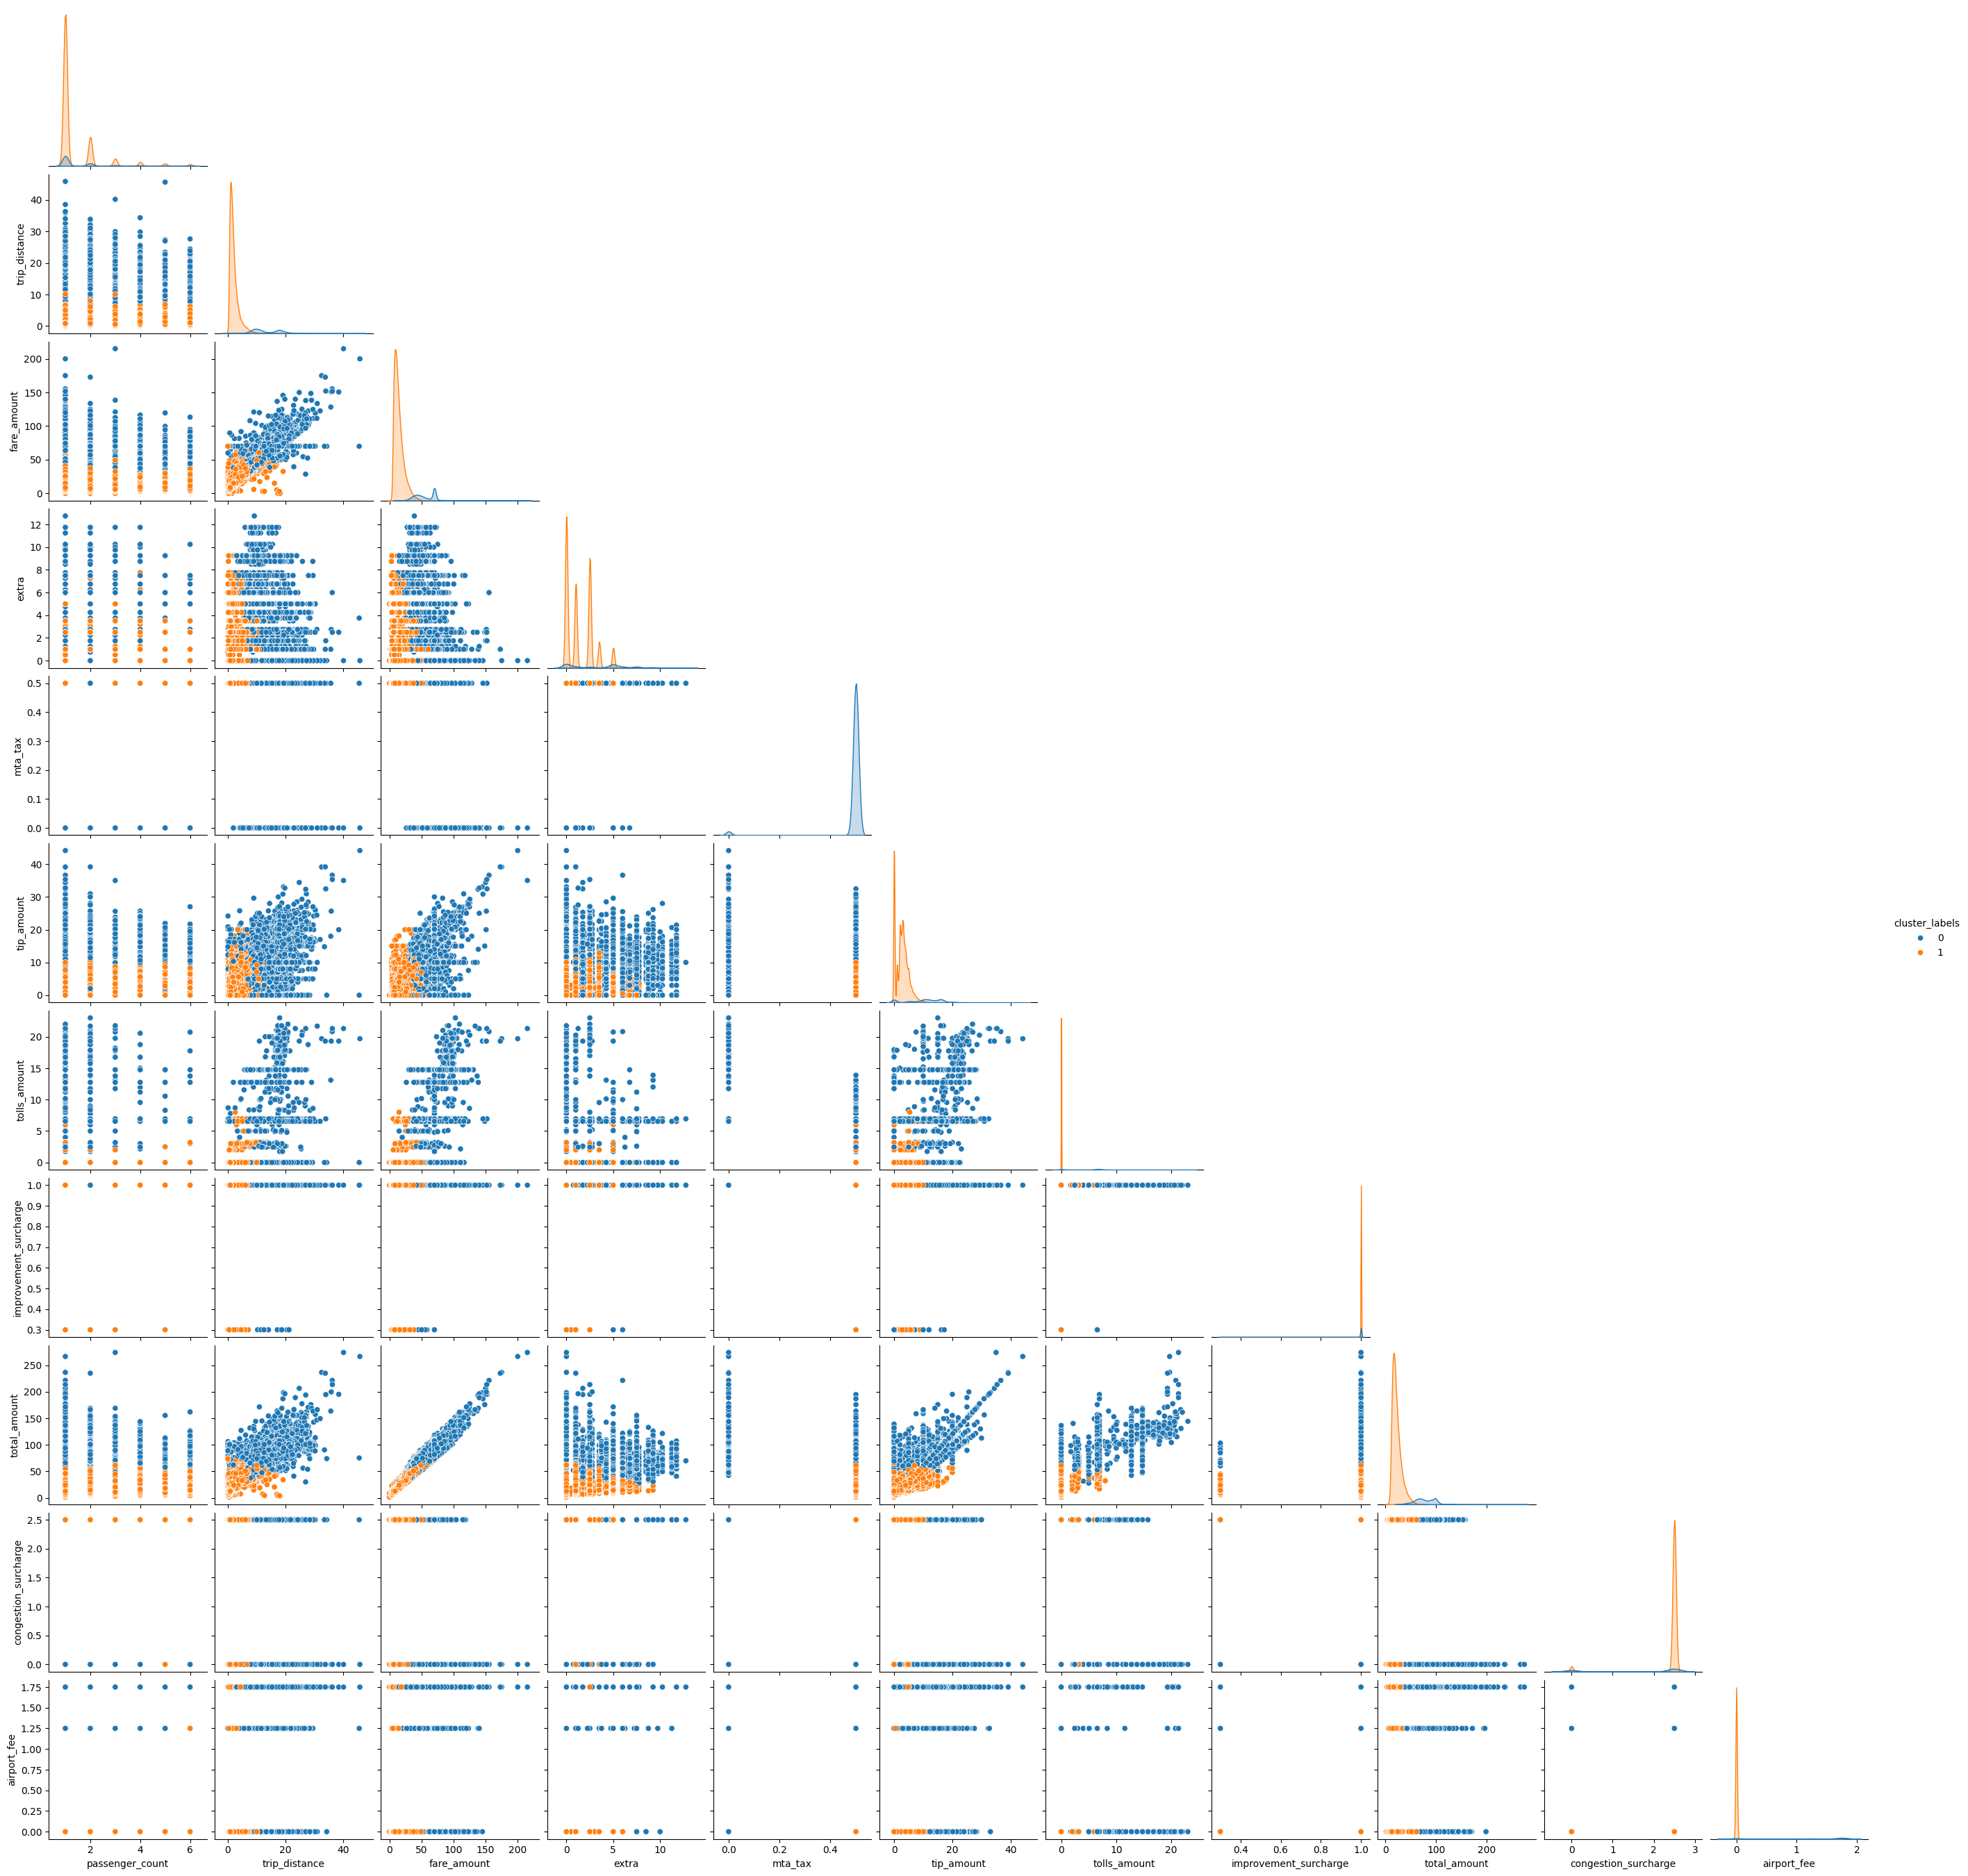

In [ ]:
#warning : takes 30 minutes to run
sns.pairplot(filtered_taxi_data_num, hue = 'cluster_labels', corner = True)

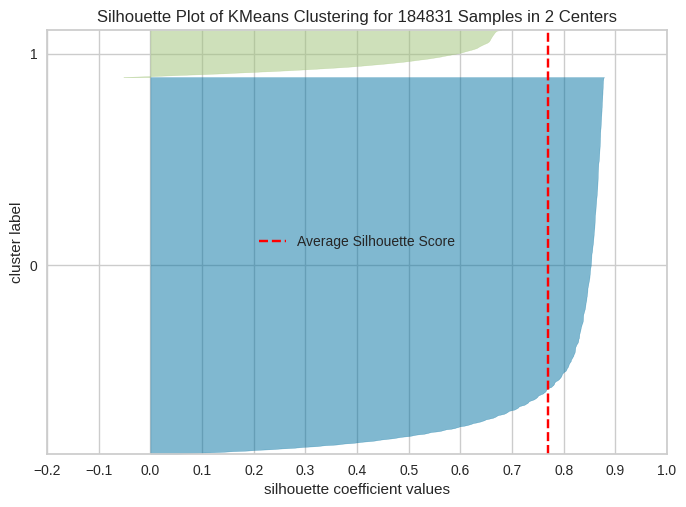

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 184831 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#takes 15 mins
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(2)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(filtered_taxi_data_num)
visualizer.show()